In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

def xpercent_scale():
    gca().set_xticklabels(['{:.0f}%'.format(x*100) for x in gca().get_xticks()])

In [3]:
results = pd.read_csv('MOB_final_results.csv', index_col=0)
ms_results = pd.read_csv('MOB_MS_results.csv', index_col=0)
sample_info = pd.read_csv('MOB_sample_info.csv', index_col=0)

In [4]:
df = pd.read_csv('data/Rep11_MOB_0.csv', index_col=0)
df = df.T[df.sum(0) >= 3].T  # Filter practically unobserved genes
sample_info = sample_info.query('total_counts > 10')  # Remove empty features
df = df.loc[sample_info.index]
dfm = np.log10(df + 1)

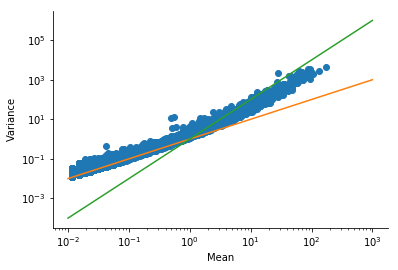

In [5]:
figsize(6, 4)
plt.loglog()
plt.scatter(df.mean(), df.var());
xy = [1e-2, 1e3]
plt.plot(xy, xy, c='C1');
plt.plot(xy, np.square(xy), c='C2');
plt.xlabel('Mean')
plt.ylabel('Variance');

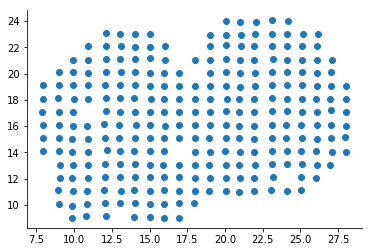

In [6]:
plt.scatter(sample_info.x, sample_info.y);

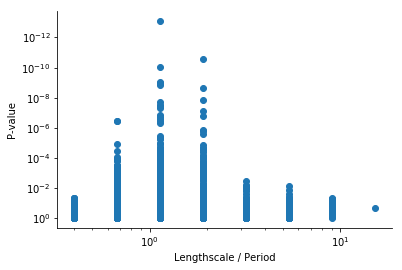

In [7]:
plt.loglog()
plt.scatter(results.l, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Lengthscale / Period')
plt.ylabel('P-value');

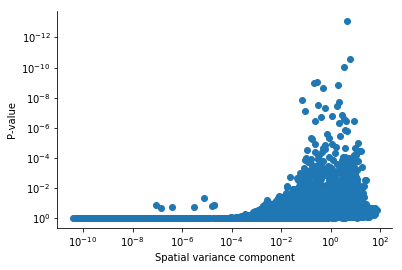

In [8]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('P-value');

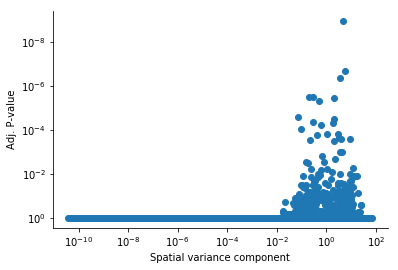

In [9]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('Adj. P-value');

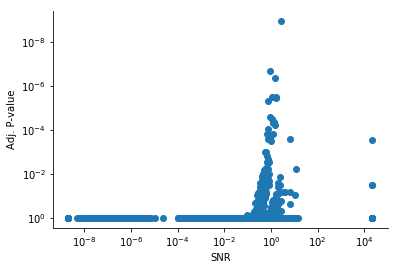

In [10]:
plt.loglog()
plt.scatter(1. / results.max_delta, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('SNR')
plt.ylabel('Adj. P-value');

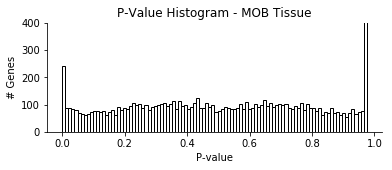

In [11]:
figsize(6, 2)
plt.hist(results.pval, bins=100, color='w', ec='k');
plt.title('P-Value Histogram - MOB Tissue')
plt.ylabel('# Genes')
plt.xlabel('P-value');
plt.ylim(ymax=400)

plt.savefig('MOB-pvalue-hist.pdf')

In [12]:
ms_results.model.value_counts()

SE     49
PER    19
Name: model, dtype: int64

In [13]:
N = 6
top_per_ls = ms_results.query('qval < 0.05') \
    .query('g != "log_total_count"') \
    .sort_values('qval', ascending=True) \
    .groupby(['model', 'l']) \
    .head(N) \
    .sort_values(['l', 'qval'], ascending=[True, True])

top_per_ls

,BIC,FSV,LLR,M,g,l,max_delta,max_ll,max_mu_hat,max_s2_t_hat,...,n,s2_FSV,s2_logdelta,time,PER_prob,SE_prob,linear_prob,pval,qval,max_ll_null
22,571.962278,0.865678,25.974549,4,Cdr1,0.675535,0.154156,-274.859776,-4.861639,9.057264,...,260,0.004494,3.053004e-01,0.001262,1.003509e-05,9.999899e-01,2.974333e-08,3.459481e-07,2.705678e-04,-300.834325
24,-737.072132,0.999954,25.802801,4,Taf7l,0.675535,0.000045,379.657429,0.759994,0.226635,...,260,0.014109,4.893483e+06,0.000728,4.301653e-22,1.000000e+00,1.008747e-20,3.781393e-07,2.809575e-04,353.854628
23,-916.625447,0.924751,19.150605,4,4933405L10Rik,0.675535,0.080844,469.434087,0.793755,0.236625,...,260,0.014468,2.502667e+00,0.001257,1.634579e-16,1.000000e+00,6.050709e-15,1.207992e-05,5.790568e-03,450.283482
21,40.499266,0.701323,16.974369,4,Tspan7,0.675535,0.423110,-9.128270,-6.006126,11.899157,...,260,0.003540,8.802351e-02,0.000838,1.161987e-08,1.000000e+00,4.699598e-13,3.788785e-05,1.354168e-02,-26.102639
26,-827.366851,0.999954,14.848152,4,Olfr635,0.675535,0.000045,424.804789,0.885009,0.304708,...,260,0.000553,1.918083e+05,0.000845,1.643594e-13,1.000000e+00,3.302704e-11,1.165222e-04,3.091999e-02,409.956637
25,-827.366851,0.999954,14.848152,4,Gna14,0.675535,0.000045,424.804789,0.885009,0.304708,...,260,0.000553,1.918083e+05,0.001482,1.643594e-13,1.000000e+00,3.302704e-11,1.165222e-04,3.091999e-02,409.956637
51,72.920564,0.720274,55.875922,4,Cpe,1.135190,0.379205,-25.338919,-5.626476,4.628933,...,260,0.000167,4.425241e-03,0.000743,5.342926e-31,1.000000e+00,7.631344e-47,7.716050e-14,1.146605e-09,-81.214841
31,331.780927,0.586902,41.966229,4,Fabp7,1.135190,0.687270,-154.769100,5.036316,3.603940,...,260,0.000407,7.999172e-03,0.000775,8.078450e-14,1.000000e+00,1.603287e-34,9.286349e-11,4.599838e-07,-196.735329
48,402.569494,0.614457,37.573584,4,Cck,1.135190,0.612662,-190.163384,-0.673485,0.281531,...,260,0.000352,7.170532e-03,0.000821,2.274753e-11,1.000000e+00,6.022966e-31,8.802861e-10,3.257486e-06,-227.736968
46,371.451514,0.530409,37.146026,4,Kif5b,1.135190,0.864467,-174.604394,0.639634,0.208328,...,260,0.000343,6.460562e-03,0.000730,6.455258e-10,1.000000e+00,6.804063e-28,1.096059e-09,3.257486e-06,-211.750420


In [14]:
top_per_ls.shape

(25, 21)

In [15]:
model_colors = {'SE': 'C0', 'PER': 'C1', 'linear': 'C2'}

In [16]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes

/Users/vale/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


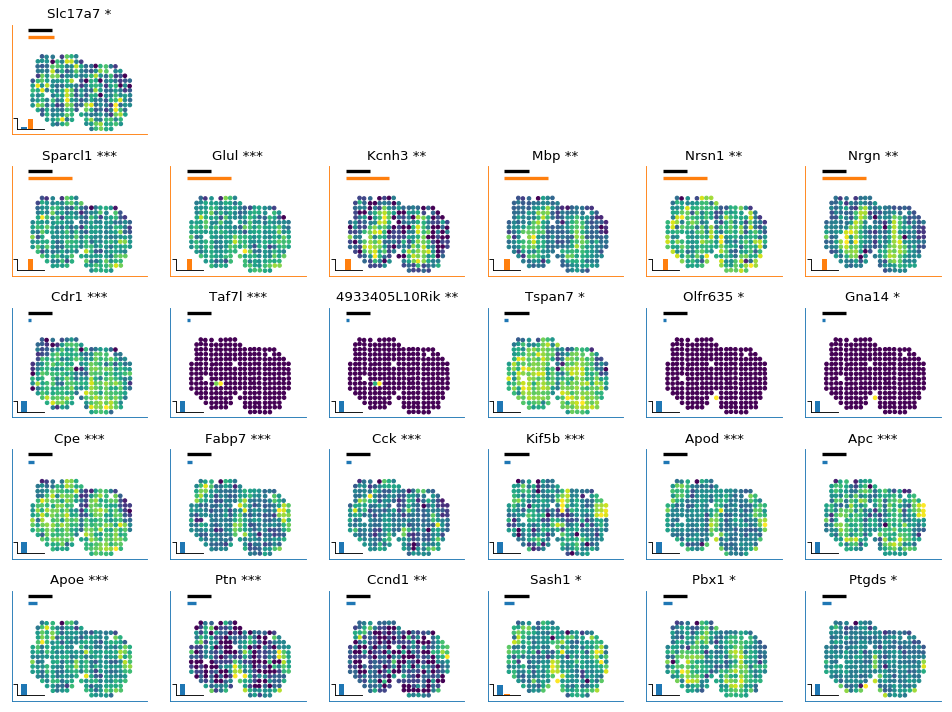

In [17]:
plt.figure(figsize=(12, 9), dpi=80)

N = 6
N_rows = top_per_ls.replace(np.nan, 0).groupby(['model', 'l']).size().shape[0]
for j, T in enumerate(top_per_ls.groupby(['model', 'l'])):
    _, group = T
    for i, idx in enumerate(group.index):
        r = top_per_ls.loc[idx]
        ax = plt.subplot(N_rows, N, j * N + i + 1)
        
        plt.scatter(sample_info.x, -sample_info.y, c=dfm[r['g']], s=10, rasterized=True);

        s = ' *'
        if r['qval'] < 0.01:
            s = ' **'

        if r['qval'] < 0.001:
            s = ' ***'

        plt.title(r['g'].replace("'", '') + s)
        
        plt.xticks([])
        plt.yticks([])
        plt.hlines(-3.5, 7, 7 + 5, lw=3)
        if r['l'] + 7 < 28:
            plt.hlines(-5, 7, 7 + r['l'], lw=3, color=model_colors[r['model']], zorder=0)
            
        else:
            plt.hlines(-5, 7, 25.5, lw=3, color=model_colors[r['model']], zorder=0)
            plt.plot([25, 26], [-6, -4], lw=1, color=model_colors[r['model']])
            plt.plot([26, 27], [-6, -4], lw=1, color=model_colors[r['model']])
            plt.hlines(-5, 26.5, 31, lw=3, color=model_colors[r['model']])
            
        for spine in ax.spines.values():
            spine.set_edgecolor(model_colors[r['model']])
        
        plt.axis('equal')
        
        # Make insert with model probabilities
        ins_ax = inset_axes(ax, width='20%', height='10%', loc=3)
        plt.bar((1, 2, 3), top_per_ls.loc[idx][['SE_prob', 'PER_prob', 'linear_prob']], color=['C0', 'C1', 'C2'])
        plt.ylim(0, 1);
        plt.xticks([], [])
        plt.xlim(-0.0, 4)
        plt.yticks([1], ['']);

plt.tight_layout()
plt.savefig('top_MOB_genes_per_ls.pdf')

In [18]:
N = 3
top_per_ls = ms_results.query('qval < 0.05') \
    .query('g != "log_total_count"') \
    .sort_values('qval', ascending=True) \
    .groupby(['model', 'l']) \
    .head(N) \
    .sort_values(['l', 'qval'], ascending=[True, True])

In [19]:
stahl_genes = [
                'Penk', 'Doc2g', 'Kctd12',
                'Camk4', 'Vip', 'Th',
                'Nrgn', 'Pcp4', 'Rbfox3', 'Nrsn1', 'Calb2', 'Eomes'
              ]

results.query('g in @stahl_genes')[['g', 'model', 'qval', 'l']]

,g,model,qval,l
8891,Vip,SE,0.975231,0.675535
10585,Pcp4,SE,0.012618,1.135190
10595,Eomes,SE,0.127669,1.135190
10613,Rbfox3,SE,0.030408,1.135190
10635,Camk4,SE,0.145242,1.135190
10639,Penk,SE,0.020116,1.135190
11075,Doc2g,SE,0.000046,1.135190
11114,Nrgn,SE,0.005284,1.135190
11148,Kctd12,SE,0.000058,1.135190
11828,Th,SE,0.975231,1.907609


In [20]:
ms_results.query('g in @stahl_genes')[['g', 'model', 'qval', 'l']]

,g,model,qval,l
1,Pcp4,PER,0.012618,9.052138
2,Rbfox3,PER,0.030408,9.052138
5,Nrgn,PER,0.005284,9.052138
17,Nrsn1,PER,0.001614,9.052138
29,Penk,SE,0.020116,1.135190
52,Doc2g,SE,0.000046,1.135190
56,Kctd12,SE,0.000058,1.135190


In [21]:
9 / 5

1.8

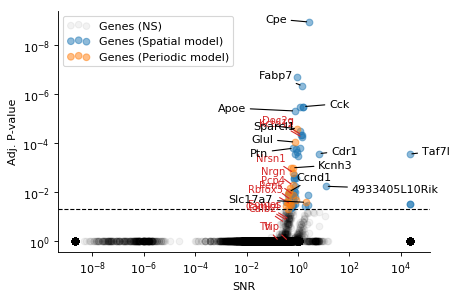

In [22]:
plt.figure(figsize=(6, 4), dpi=80)

plt.xscale('log')
plt.yscale('log')

tmp = results.query('qval > 0.05')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.05, rasterized=True, label='Genes (NS)', marker='o', color='k');

tmp = ms_results.query('model == "SE"')
plt.scatter(1. / tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Spatial model)', marker='o', color='C0');

tmp = ms_results.query('model == "PER"')
tmp = tmp.drop('max_delta', 1).merge(results[['g', 'max_delta']], on='g')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Periodic model)', marker='o', color='C1');

# Annotate Stahl genes
tmp = results.query('g in @stahl_genes')

x_offsets = {}
y_offsets = {}
for i, r in tmp.iterrows():
    xy = (1./r['max_delta'], r['qval'])
    xyt = (xy[0] / x_offsets.get(r['g'], 2),
           xy[1] / y_offsets.get(r['g'], 3),)
    plt.annotate(r['g'], xy, xyt, color='tab:red', horizontalalignment='right',
                 arrowprops={'arrowstyle': '-', 'color': 'tab:red'}, size=9)

# Annotate top genes
x_offsets = {
    'Apc': 1e1,
    '4933405L10Rik': 1e1,
    'Cck': 1e1,
    'Apoe': 1e-3,
    'Apod': 1e1,
    'Nrsn1': 1e-3,
    'Kcnh3': 1e1,
    'Ccnd1': 2e0,
    'Tspan7': 1e1,
    'Taf7l': 3,
    'Cdr1': 3,
    'Slc17a7': 1e-3
}
y_offsets = {
    'Apod': 2e-1,
    'Pbx1': 1e-1,
    'Olfr635': 2e-1,
    'Tspan7': 4e-1,
    '4933405L10Rik': 6e-1,
    'Ccnd1': 3e0,
    'Kif5b': 2e0,
    'Fabp7': 2e0,
    'Ptn':5e-1,
    'Nrsn1':5e-1
}
for i, r in results.query('g in @top_per_ls.g').query('g not in @stahl_genes').iterrows():
    xy = (1. / r['max_delta'], r['qval'])
    xyt = (xy[0] * x_offsets.get(r['g'], 2e-2),
           xy[1] / y_offsets.get(r['g'], 1),)
    plt.annotate(r['g'].replace("'", ''), xy, xyt, color='k', arrowprops={'arrowstyle': '-'})

plt.axhline(0.05, ls='--', c='k', lw=1)
plt.xlabel('SNR');
plt.ylabel('Adj. P-value');
plt.gca().invert_yaxis()

plt.legend(scatterpoints=3, loc='upper left');

plt.savefig('sigma_pval_MOB.pdf', bbox_inches='tight');

In [23]:
import SpatialDE.plot

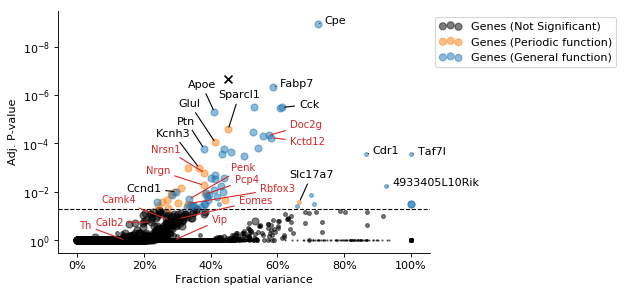

In [24]:
plt.figure(figsize=(6, 4), dpi=80)

# plt.xscale('log')
plt.yscale('log')

SpatialDE.plot.FSV_sig(results, ms_results)

# Annotate Stahl genes
tmp = results.query('g in @stahl_genes')

x_offsets = {
    'Doc2g': -0.16,
    'Kctd12': -0.16,
    'Nrsn1': 0.07,
    'Nrgn': 0.1,
    'Th': 0.1,
    'Vip': -0.16,
    'Pcp4': -0.16,
    'Penk': -0.2,
    'Calb2': 0.08,
    'Eomes': -0.28,
    'Rbfox3': -0.32,
    'Camk4': 0.1
}
y_offsets = {
    'Doc2g': 2e0,
    'Kctd12': 5e-1,
    'Vip': 5e0,
    'Penk': 1.5e1,
    'Eomes': 4e0,
    'Rbfox3': 3e0,
    'Nrsn1': 7e0,
    'Camk4': 5e0,
    'Calb2': 7e-1
}
for i, r in tmp.iterrows():
    xy = (r['FSV'], r['qval'])
    xyt = (xy[0] - x_offsets.get(r['g'], 0.02),
           xy[1] / y_offsets.get(r['g'], 3),)
    plt.annotate(r['g'], xy, xyt, color='tab:red', horizontalalignment='right',
                 arrowprops={'arrowstyle': '-', 'color': 'tab:red'}, size=9)

# Annotate top genes
x_offsets = {
    'Kif5b': -5e-2,
    '4933405L10Rik': 2e-2,
    'Cck': 5e-2,
    'Apoe': -8e-2,
    'Sparcl1': -3e-2,
    'Glul': -11e-2,
    'Ptn': -8e-2,
    'Sash1': -25e-2,
    'Ccnd1': -15e-2,
    'Mbp': -30e-2,
    'Kcnh3': -13e-2,
    'Slc17a7': -3e-2,
    'Pbx1': -22e-2
}
y_offsets = {
    'Apod': 2e-1,
    'Kif5b': 1e1,
    'Apoe': 1e1,
    'Sparcl1': 2e1,
    'Glul': 3e1,
    'Ptn': 1e1,
    'Kcnh3': 2e1,
    'Mbp': 3e1,
    'Slc17a7': 1e1
}
for i, r in results.query('g in @top_per_ls.g').query('g not in @stahl_genes').iterrows():
    xy = (r['FSV'], r['qval'])
    xyt = (xy[0] + x_offsets.get(r['g'], 2e-2),
           xy[1] / y_offsets.get(r['g'], 1),)
    plt.annotate(r['g'].replace("'", ''), xy, xyt, color='k', arrowprops={'arrowstyle': '-'})

plt.savefig('FSV_qval_mob.PDF', bbox_inches='tight')

In [25]:
results.query('g in @stahl_genes').sort_values('qval')[['g', 'qval']]

,g,qval
11075,Doc2g,0.000046
11148,Kctd12,0.000058
12411,Nrsn1,0.001614
11114,Nrgn,0.005284
10585,Pcp4,0.012618
10639,Penk,0.020116
10613,Rbfox3,0.030408
10595,Eomes,0.127669
10635,Camk4,0.145242
12040,Calb2,0.174573


In [26]:
results.query('qval < 0.05').shape

(68, 18)

/Users/vale/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


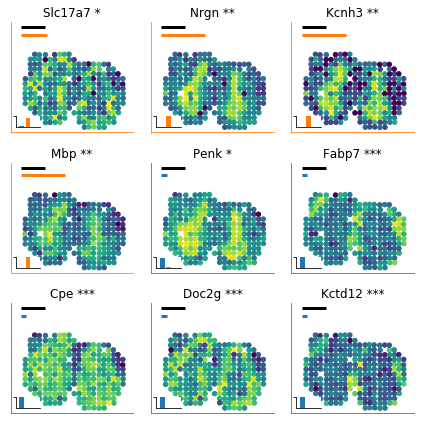

In [32]:
figsize(6, 6)
N = 3
N_rows = 3
gene_sel = ["Penk", "Doc2g", "Kctd12", "Kcnh3", "Nrgn", "Mbp", "Slc17a7", "Cpe", "Fabp7"]
select_genes = ms_results.query('g in @gene_sel')
for i, idx in enumerate(select_genes.index):
    r = select_genes.loc[idx]
    ax = plt.subplot(N_rows, N, i + 1)

    plt.scatter(sample_info.x, -sample_info.y, c=dfm[r['g']], s=20);

    s = ' *'
    if r['qval'] < 0.01:
        s = ' **'

    if r['qval'] < 0.001:
        s = ' ***'

    plt.title(r['g'] + s)

    plt.xticks([])
    plt.yticks([])
    plt.hlines(-3.5, 7, 12, lw=3)
    if r['l'] + 7 < 28:
        plt.hlines(-5, 7, 7 + r['l'], lw=3, color=model_colors[r['model']], zorder=0)

    else:
        plt.hlines(-5, 7, 25.5, lw=2, color=model_colors[r['model']], zorder=0)
        plt.plot([25, 26], [-6, -4], lw=1, color=model_colors[r['model']])
        plt.plot([26, 27], [-6, -4], lw=1, color=model_colors[r['model']])
        plt.hlines(-5, 26.5, 31, lw=2, color=model_colors[r['model']])
        
    for spine in ax.spines.values():
        spine.set_edgecolor(model_colors[r['model']])

    plt.axis('equal')
    
    # Make insert with model probabilities
    ins_ax = inset_axes(ax, width='20%', height='10%', loc=3)
    plt.bar((1, 2, 3), select_genes.loc[idx][['SE_prob', 'PER_prob', 'linear_prob']], color=['C0', 'C1', 'C2'])
    plt.ylim(0, 1);
    plt.xticks([], [])
    plt.xlim(-0.0, 4)
    plt.yticks([1], ['']);


plt.tight_layout()
plt.savefig('MOB_select_genes.pdf')